In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append("../")

from video   import height, width, read_qcif
from Huffman import Huffman_encode, Huffman_decode
from Difference_image import Difference_image_compute
from tools import compression_benchmark

# Format for qcif images
width = 176
height = 144

In [3]:
frames = read_qcif("../videos/carphone.qcif",2)

nb_frames,frame_size = frames.shape

data = np.zeros((nb_frames*frame_size),dtype=int)
data[:frame_size] = frames[0]
for k in range(1,nb_frames):
    data[frame_size*k:frame_size*(k+1)] = frames[k]-frames[k-1]

In [3]:
bitstream = Huffman_encode(data)
decompressed_data   = Huffman_decode(bitstream)

Decoding: 100%|██████████| 487870/487870 [00:00<00:00, 1021541.90it/s]


# Check that Huffman worked

In [4]:
abs(data-np.array(decompressed_data,dtype=float)).sum()

0.0

# Performances tests

In [4]:
videos_names = []
for fname in os.listdir("../videos"):
    if fname.endswith(".qcif"):
        videos_names.append("../videos/"+fname)
print(videos_names)

['../videos/coastguard.qcif', '../videos/hall.qcif', '../videos/news.qcif', '../videos/akiyo.qcif', '../videos/carphone.qcif']


In [6]:
for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)

    print("#############################################################################################")
    print("Huffman on "+fname)
    bitstream = Huffman_encode(frames.flatten())
    compression_benchmark(frames,bitstream)
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)    
    diff = Difference_image_compute(frames)
    bitstream = Huffman_encode(diff.flatten())
    compression_benchmark(frames,bitstream)

#############################################################################################
Huffman on ../videos/coastguard.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1168106.24it/s]


B/symb:  6.900131085157127
Original size (MiB):  10.87646484375
Compressed size (%):  86.25163856446409
#--------------------------------------#
Diff+Huffman on ../videos/coastguard.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1180496.78it/s]


B/symb:  4.517092627665544
Original size (MiB):  10.87646484375
Compressed size (%):  56.463657845819306
#############################################################################################
Huffman on ../videos/hall.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1216724.48it/s]


B/symb:  6.948109655583614
Original size (MiB):  10.87646484375
Compressed size (%):  86.85137069479516
#--------------------------------------#
Diff+Huffman on ../videos/hall.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1258836.58it/s]


B/symb:  3.32935746352413
Original size (MiB):  10.87646484375
Compressed size (%):  41.616968294051624
#############################################################################################
Huffman on ../videos/news.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1277533.95it/s]


B/symb:  7.032959718714927
Original size (MiB):  10.87646484375
Compressed size (%):  87.91199648393658
#--------------------------------------#
Diff+Huffman on ../videos/news.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1271204.78it/s]


B/symb:  2.189780180274972
Original size (MiB):  10.87646484375
Compressed size (%):  27.37225225343715
#############################################################################################
Huffman on ../videos/akiyo.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:11<00:00, 992694.40it/s]


B/symb:  7.137040982744108
Original size (MiB):  10.87646484375
Compressed size (%):  89.21301228430136
#--------------------------------------#
Diff+Huffman on ../videos/akiyo.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1251689.37it/s]


B/symb:  1.6262406179854096
Original size (MiB):  10.87646484375
Compressed size (%):  20.32800772481762
#############################################################################################
Huffman on ../videos/carphone.qcif


Encoding: 100%|██████████| 14522112/14522112 [00:14<00:00, 971766.12it/s] 


B/symb:  7.057345446722901
Original size (MiB):  13.849365234375
Compressed size (%):  88.21681808403626
#--------------------------------------#
Diff+Huffman on ../videos/carphone.qcif


Encoding: 100%|██████████| 14522112/14522112 [00:12<00:00, 1161454.79it/s]

B/symb:  3.8995818239110123
Original size (MiB):  13.849365234375
Compressed size (%):  48.74477279888765


#############################################################################################
Huffman on ../videos/coastguard.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1293226.97it/s]


#--------------------------------------#
Diff+Huffman on ../videos/coastguard.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:10<00:00, 1050738.85it/s]


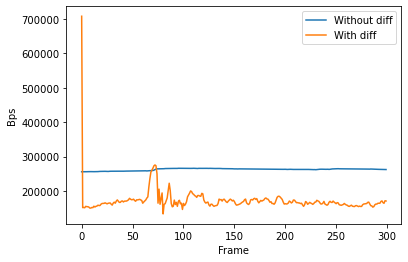

#############################################################################################
Huffman on ../videos/hall.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1188608.88it/s]


#--------------------------------------#
Diff+Huffman on ../videos/hall.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1248933.40it/s]


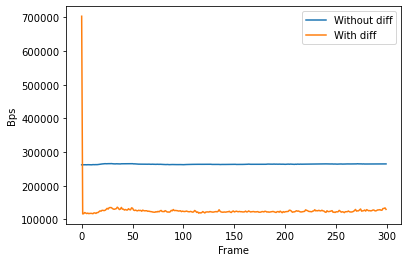

#############################################################################################
Huffman on ../videos/news.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1307220.86it/s]


#--------------------------------------#
Diff+Huffman on ../videos/news.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:09<00:00, 1237884.63it/s]


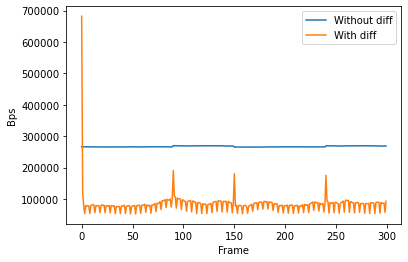

#############################################################################################
Huffman on ../videos/akiyo.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1302794.89it/s]


#--------------------------------------#
Diff+Huffman on ../videos/akiyo.qcif


Encoding: 100%|██████████| 11404800/11404800 [00:08<00:00, 1319521.46it/s]


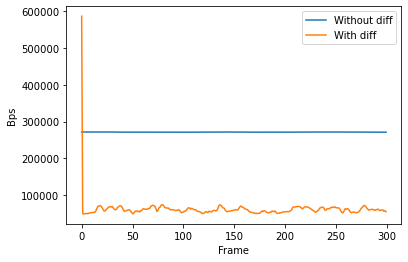

#############################################################################################
Huffman on ../videos/carphone.qcif


Encoding: 100%|██████████| 14522112/14522112 [00:11<00:00, 1229062.28it/s]


#--------------------------------------#
Diff+Huffman on ../videos/carphone.qcif


Encoding: 100%|██████████| 14522112/14522112 [00:11<00:00, 1229473.09it/s]


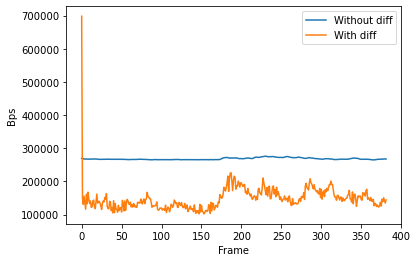

In [6]:
for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    plt.figure()
    print("#############################################################################################")
    print("Huffman on "+fname)
    bitstream = Huffman_encode(frames.flatten())
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)    
    diff = Difference_image_compute(frames)
    bitstream = Huffman_encode(diff.flatten())
    plt.xlabel("Frame")
    plt.ylabel("Bps")
    plt.legend(["Without diff","With diff"])
    plt.show()